#NVDA Stock Price Prediction

Apex Quant is interested in potentially opening a position on NVDA. You have been tasked with looking into the stock, and we are asking that you back up your thesis with research/stats.

Create data visualizations, and use math/stats to back up whatever your ideas are to the best of your abilities. You are free to use any libraries you want.

In [ ]:
!pip install mplfinance
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr
import mplfinance as mpf
from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
nvda_prices = yf.download('NVDA', period='max')
nvda_prices.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000


## Exploratory Data Analysis

* Derive insights about NVDA's stock.
* Find relationships between NVDA and microeconomic/macroeconomic factors.

In [ ]:
#Initial analysis of Nvidia's stock prices and basic statistics
nvda_prices.info()
nvda_prices.isna().sum()
nvda_prices.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6203 entries, 1999-01-22 to 2023-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6203 non-null   float64
 1   High       6203 non-null   float64
 2   Low        6203 non-null   float64
 3   Close      6203 non-null   float64
 4   Adj Close  6203 non-null   float64
 5   Volume     6203 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 339.2 KB


,Open,High,Low,Close,Adj Close,Volume
count,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6.203000e+03
mean,37.321290,38.022332,36.592846,37.334646,37.072215,6.117420e+07
std,76.713672,78.151890,75.163545,76.694985,76.705680,4.379955e+07
min,0.348958,0.355469,0.333333,0.341146,0.312976,1.968000e+06
25%,2.695000,2.783750,2.625000,2.702500,2.479344,3.448680e+07
50%,4.410000,4.479167,4.327500,4.407500,4.052728,5.132640e+07
75%,36.160002,36.735001,35.637501,36.167500,35.822115,7.438140e+07
max,502.160004,502.660004,489.579987,493.549988,493.509338,9.230856e+08


**Time Series Plot:** Line plot of NVDA adjusted close prices and bar graph of trading volume to visualize trend of stock prices over time

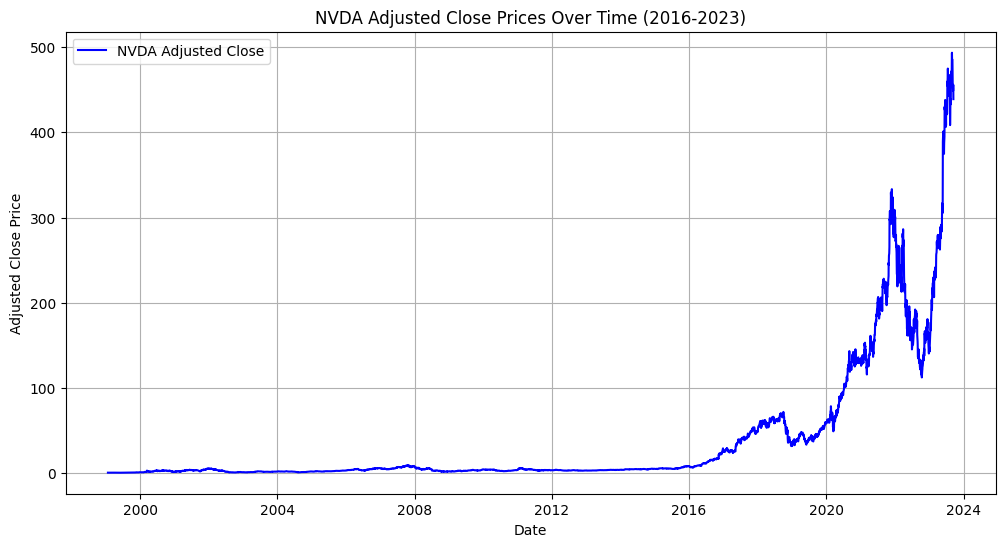

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(nvda_prices.index, nvda_prices['Adj Close'], label='NVDA Adjusted Close', color='b')
plt.title('NVDA Adjusted Close Prices Over Time (2016-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

**Recent Time Series Plot**: Line plot of more recent NVDA adjusted close prices and bar graph of trading volume since NVDA stock has significantly changed in the past 7 years compared to previous years.

[*********************100%%**********************]  1 of 1 completed


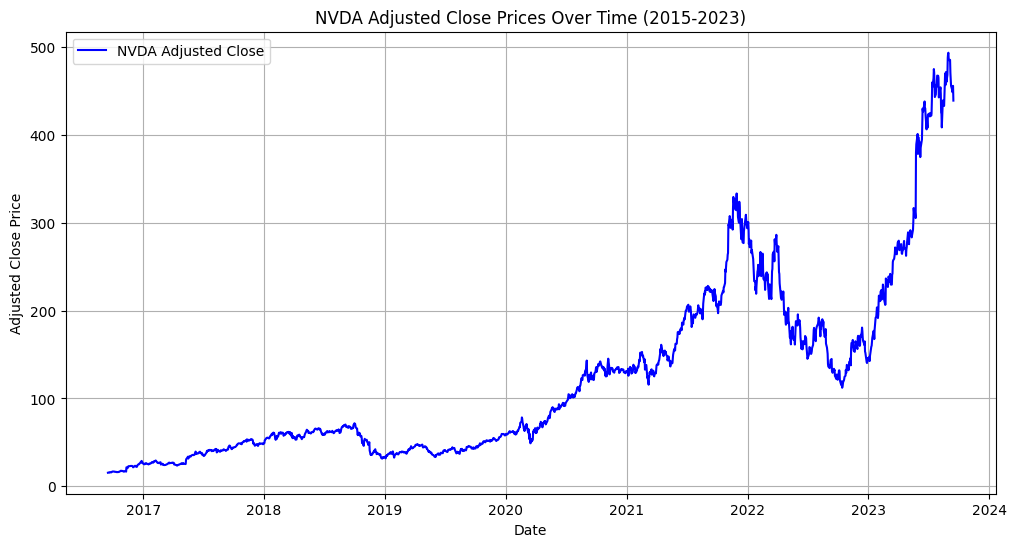

In [ ]:
#Refine NVDA price dataset to focus on more recent data since trends in stock prices before this time period are not as relevant in
#forecasting future data. This is because stock prices were much lower and volatile than in recent years.
nvda_prices_recent = yf.download('NVDA', period = '7y')
plt.figure(figsize=(12, 6))
plt.plot(nvda_prices_recent.index, nvda_prices_recent['Adj Close'], label='NVDA Adjusted Close', color='b')
plt.title('NVDA Adjusted Close Prices Over Time (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

**Moving Average Chart:** A line chart of NVDA 50-day and 200-day moving averages to visualize trends in the Nvidia stock price since IPO.

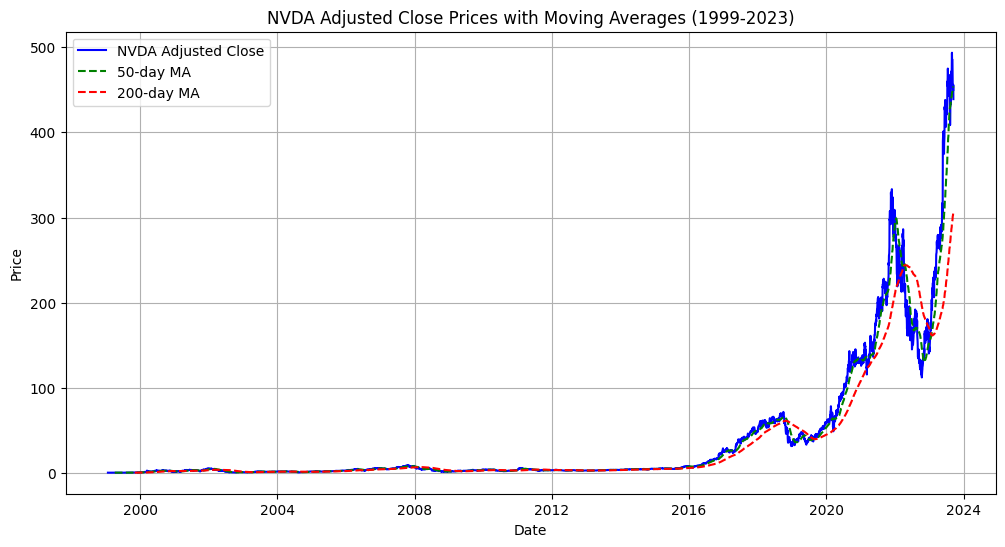

In [ ]:
# Calculate 50-day and 200-day moving averages
nvda_prices['50-day MA'] = nvda_prices['Adj Close'].rolling(window=50).mean()
nvda_prices['200-day MA'] = nvda_prices['Adj Close'].rolling(window=200).mean()

# Create a plot with moving averages
plt.figure(figsize=(12, 6))
plt.plot(nvda_prices.index, nvda_prices['Adj Close'], label='NVDA Adjusted Close', color='b')
plt.plot(nvda_prices.index, nvda_prices['50-day MA'], label='50-day MA', color='g', linestyle='--')
plt.plot(nvda_prices.index, nvda_prices['200-day MA'], label='200-day MA', color='r', linestyle='--')
plt.title('NVDA Adjusted Close Prices with Moving Averages (1999-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

According to the moving average graph, NVDA stock prices stayed in the single and lower double digits from its IPO in 1999 to early 2016. At this point, NVDA stock prices began to rise significantly. The stock prices trended upwards between 2016 to late 2018, achieving roughly a 50% increase in that time period. Around this time period, NVDA stock prices began to trend downwards. This continued until the end of 2019, which resulted in a 25% decrease from late 2018. At the start of 2020, NVDA stock prices began trend upwards again, and at a faster rate than it did between 2017 and late 2018. This upward trend continued till the spring of 2022. During this time period, NVDA stock prices increased by roughly 400%. Between spring 2022 and early 2023, the stock price trended downwards resulting in the price to decrease by roughly 30%. Beginning early 2023, prices began to trend upwards again and continue to trend upwards to present day.  

**Trading Volume Bar Chart:** A bar chart of NVDA trading volume over the course of the stock's history.

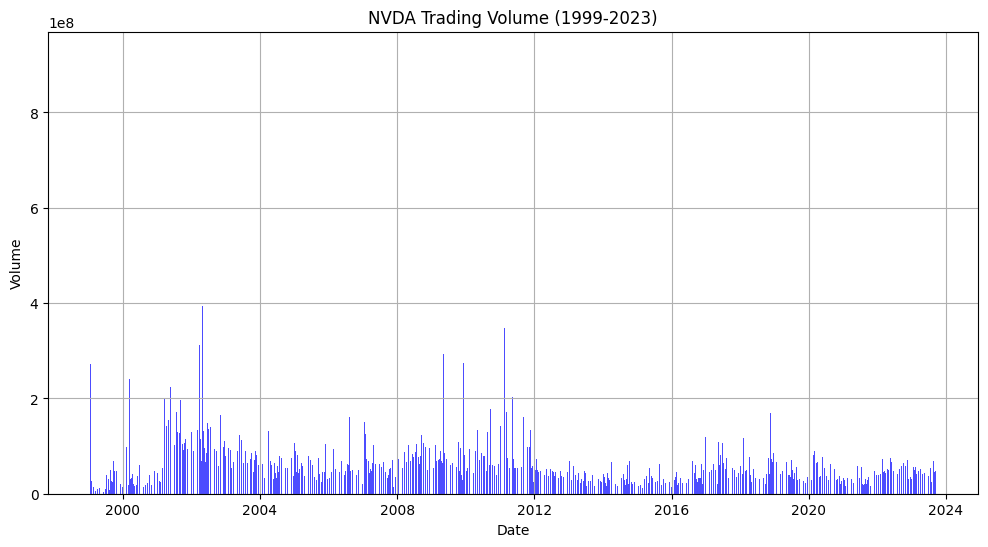

Average Trading Volume: 61174200.274060935


In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(nvda_prices.index, nvda_prices['Volume'], color='b', alpha=0.7)
plt.title('NVDA Trading Volume (1999-2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()
print("Average Trading Volume: "+ str(nvda_prices['Volume'].mean()))

The trading volume on average is very high as expected for a stock with a 1.1 trillion dollar market cap. While the trading volume varies throughout the years, it stays consistently in the 10 million to 100 million range. A high trading volume coupled with rising prices as noted by the moving average chart indicates a bullish signal for this stock.

**Daily Returns Frequency Plot:** A frequency chart of NVDA daily returns since its IPO to depict average stock performance.

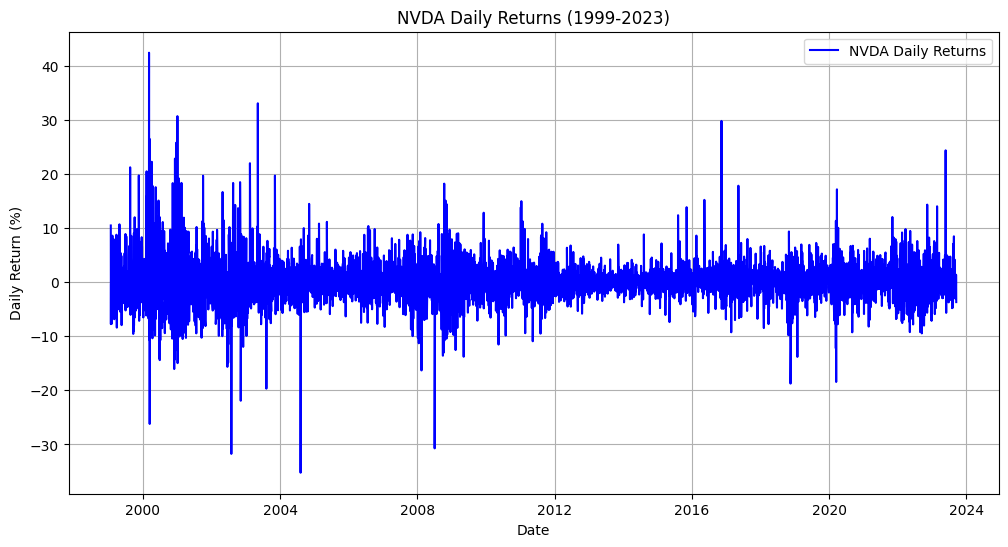

Average Daily Return: 0.1859979384020569%
252-Day Historical Average Volatility: 60.49695702501997%


In [ ]:
nvda_prices['Daily Return'] = nvda_prices['Adj Close'].pct_change() * 100  # Percentage returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_prices.index, nvda_prices['Daily Return'], label='NVDA Daily Returns', color='b')
plt.title('NVDA Daily Returns (1999-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()
print("Average Daily Return: "+ str(nvda_prices['Daily Return'].mean()) + '%')
n_days = 252  # Number of trading days in a year (typical for U.S. markets
nvda_prices['Volatility'] = (np.std(nvda_prices['Daily Return']))
nvda_prices['Volatility'] = nvda_prices['Volatility'] * np.sqrt(252)
print("252-Day Historical Average Volatility: " + str(nvda_prices['Volatility'].mean()) + '%')

The average return is +0.18%, indicating a net positive return, but usually ranges between -10 and 10%. The 252-day annualized historical volatility is 60.5%. This indicates that NVDA is a very volatile stock, but has potential for higher returns.

**Analysis of Microeconomic and Macroeconomic Factors**




**NVDA Financials:** Analyzing the correlation between financials and adjusted close price is critical because financials are important in predicting trends in stock prices and can be used to determine the value of a company. The variables I am going to be analyze in relation to the adjusted close price are Total Revenue, Earnings Per Share, and PE Ratio.

In [ ]:
nvda_adj = nvda_prices[['Adj Close']] #Create NVDA dataset with only adjusted close price to measure correlation to microecomomic and macroeconomic factors

In [ ]:
nvda_fin = pd.read_csv('nvda_fin.csv')
nvda_fin = nvda_fin.transpose()
nvda_fin = nvda_fin.drop('ttm')
nvda_fin = nvda_fin.reset_index()
new_column_names = nvda_fin.iloc[0]
nvda_fin = nvda_fin[1:]
nvda_fin.columns = new_column_names
nvda_fin = nvda_fin.reset_index(drop=True)
nvda_fin['Date'] = nvda_fin['name'].apply(lambda x: datetime.strptime(str(x), "%m/%d/%Y"))
nvda_fin = pd.merge(nvda_fin, nvda_adj['Adj Close'], on='Date')
nvda_fin = nvda_fin.drop(['name'], axis = 1)
nvda_fin = nvda_fin.astype(str)
for column in nvda_fin.columns:
  if(column != 'Date'):
    nvda_fin[column] = nvda_fin[column].str.replace(',', '', regex=True).astype(float)
nvda_fin['PE'] = nvda_fin['Adj Close'] / nvda_fin['DilutedEPS']

In [ ]:
pd.set_option('display.max_columns', None)
nvda_fin.head()

,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\tResearchAndDevelopment,\tDepreciationAmortizationDepletionIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,\t\t\tDepreciationIncomeStatement,\t\t\tAmortization,\t\t\t\tAmortizationOfIntangiblesIncomeStatement,\tOtherOperatingExpenses,OperatingIncome,NetNonOperatingInterestIncomeExpense,\tInterestIncomeNonOperating,\tInterestExpenseNonOperating,\tTotalOtherFinanceCost,OtherIncomeExpense,\tSpecialIncomeCharges,\t\tRestructuringAndMergernAcquisition,\t\tOtherSpecialCharges,\tOtherNonOperatingIncomeExpenses,PretaxIncome,TaxProvision,NetIncomeCommonStockholders,\tNetIncome,\t\tNetIncomeIncludingNoncontrollingInterests,\t\t\tNetIncomeContinuousOperations,\t\t\tNetIncomeExtraordinary,DilutedNIAvailtoComStockholders,BasicEPS,DilutedEPS,BasicAverageShares,DilutedAverageShares,TotalOperatingIncomeAsReported,TotalExpenses,NetIncomeFromContinuingAndDiscontinuedOperation,NormalizedIncome,InterestIncome,InterestExpense,NetInterestIncome,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems,Date,Adj Close,PE
0,1.350700e+10,1.350700e+10,4.045000e+09,9.462000e+09,2.662000e+09,622000000.0,2.040000e+09,NaN,NaN,NaN,NaN,NaN,NaN,6.800000e+09,122000000.0,187000000.0,65000000.0,NaN,59000000.0,0.0,0.0,NaN,59000000.0,6.981000e+09,793000000.0,6.188000e+09,6.188000e+09,6.188000e+09,6.188000e+09,NaN,6.188000e+09,2.50,2.48,2.473000e+09,2.499000e+09,6.800000e+09,6.707000e+09,6.188000e+09,6.188000e+09,187000000.0,65000000.0,122000000.0,7.046000e+09,7.411000e+09,4.045000e+09,365000000.0,6.188000e+09,0.0,0.0,7.411000e+09,0.114,0.0,2023-07-31,467.251526,188.407873
1,6.051000e+09,6.051000e+09,2.218000e+09,3.833000e+09,2.576000e+09,625000000.0,1.951000e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.257000e+09,50000000.0,115000000.0,65000000.0,NaN,-18000000.0,0.0,0.0,NaN,-18000000.0,1.289000e+09,-125000000.0,1.414000e+09,1.414000e+09,1.414000e+09,1.414000e+09,NaN,1.414000e+09,0.57,0.57,2.464000e+09,2.477000e+09,1.257000e+09,4.794000e+09,1.414000e+09,1.414000e+09,115000000.0,65000000.0,50000000.0,1.354000e+09,1.780000e+09,2.218000e+09,426000000.0,1.414000e+09,0.0,0.0,1.780000e+09,0.400,0.0,2023-01-31,195.300522,342.632494
2,5.931000e+09,5.931000e+09,2.754000e+09,3.177000e+09,2.576000e+09,631000000.0,1.945000e+09,NaN,NaN,NaN,NaN,NaN,NaN,6.010000e+08,23000000.0,88000000.0,65000000.0,NaN,-11000000.0,0.0,0.0,NaN,-11000000.0,6.130000e+08,-67000000.0,6.800000e+08,6.800000e+08,6.800000e+08,6.800000e+08,NaN,6.800000e+08,0.27,0.27,2.483000e+09,2.499000e+09,6.010000e+08,5.330000e+09,6.800000e+08,6.800000e+08,88000000.0,65000000.0,23000000.0,6.780000e+08,1.084000e+09,2.754000e+09,406000000.0,6.800000e+08,0.0,0.0,1.084000e+09,0.109,0.0,2022-10-31,134.887497,499.583322
3,7.643000e+09,7.643000e+09,2.644000e+09,4.999000e+09,2.029000e+09,563000000.0,1.466000e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.970000e+09,-52000000.0,9000000.0,61000000.0,NaN,-53000000.0,NaN,NaN,NaN,-53000000.0,2.865000e+09,-138000000.0,3.003000e+09,3.003000e+09,3.003000e+09,3.003000e+09,NaN,3.003000e+09,1.20,1.18,2.504000e+09,2.545000e+09,2.970000e+09,4.673000e+09,3.003000e+09,3.003000e+09,9000000.0,61000000.0,-52000000.0,2.926000e+09,3.235000e+09,2.644000e+09,309000000.0,3.003000e+09,NaN,NaN,3.235000e+09,0.400,0.0,2022-01-31,244.544250,207.240890
4,5.661000e+09,5.661000e+09,2.032000e+09,3.629000e+09,1.673000e+09,520000000.0,1.153000e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.956000e+09,-47000000.0,6000000.0,53000000.0,NaN,135000000.0,NaN,NaN,NaN,135000000.0,2.044000e+09,132000000.0,1.912000e+09,1.912000e+09,1.912000e+09,1.912000e+09,NaN,1.912000e+09,0.77,0.76,2.484000e+09,2.528000e+09,1.956000e+09,3.705000e+09,1.912000e+09,1.912000e+09,6000000.0,53000000.0,-47000000.0,2.097000e+09,2.378000e+09,2.032000e+09,281000000.0,1.912000e+09,NaN,NaN,2.378000e+09,0.065,0.

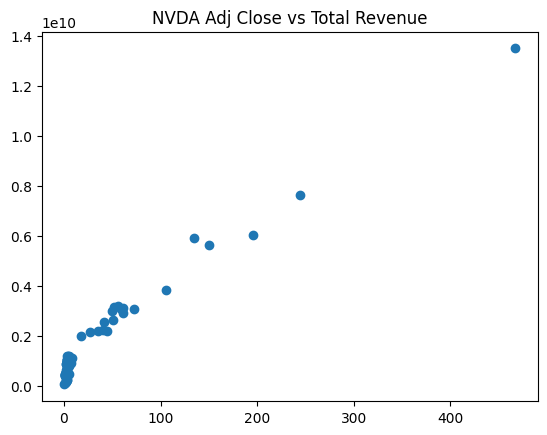

Pearson correlation: 0.978


In [ ]:
pyplot.scatter(nvda_fin['Adj Close'], nvda_fin['TotalRevenue'])
pyplot.title('NVDA Adj Close vs Total Revenue')
pyplot.show()
pearson, _ = pearsonr(nvda_fin['Adj Close'], nvda_fin['TotalRevenue'])
print('Pearson correlation: %.3f' % pearson)

NVDA's total revenue and adjusted close price have a very high Pearson correlation score at 0.978. This indicates that NVDA stock prices are likely very dependent on the total revenue NVDA generates every quarter. This makes sense because revenue is an indicator of a company's financial success, which indoubtedly has an impact on its stock price.

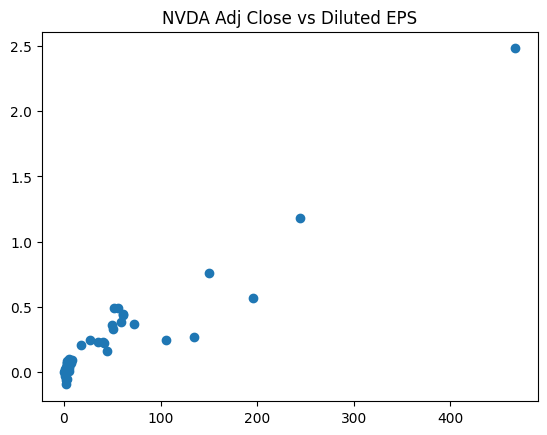

Pearson correlation: 0.960


In [ ]:
pyplot.scatter(nvda_fin['Adj Close'], nvda_fin['DilutedEPS'])
pyplot.title('NVDA Adj Close vs Diluted EPS')
pyplot.show()
pearson, _ = pearsonr(nvda_fin['Adj Close'], nvda_fin['DilutedEPS'])
print('Pearson correlation: %.3f' % pearson)

The correlation between NVDA adjusted close price and the earnings per share (EPS) is also very high with a Pearson correlation of 0.96. The EPS is important in determining the value of the company and thus influences stock prices as investors pay more for a company as its earnings grow.

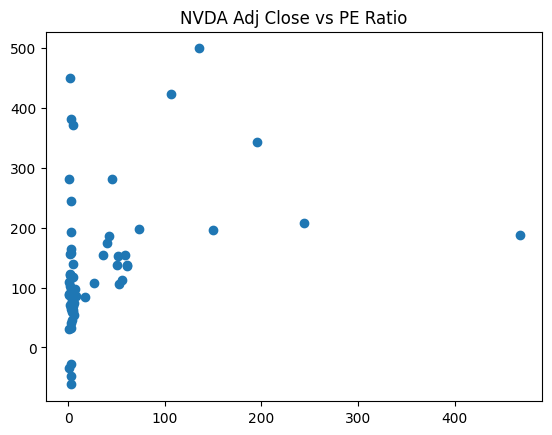

Spearman correlation: 0.363


In [ ]:
pyplot.scatter(nvda_fin['Adj Close'], nvda_fin['PE'])
pyplot.title('NVDA Adj Close vs PE Ratio')
pyplot.show()
spearman, _ = spearmanr(nvda_fin['Adj Close'], nvda_fin['PE'])
print('Spearman correlation: %.3f' % spearman)

The correlation between NVDA adjusted close price and the price per earnings ratio is not high with a Spearman correlation of 0.36. Despite this, the PE ratio is generally a good measure of investor sentiment of a certain stock and thus can impact stock prices due to its influence on investor decisions. For example, a high PE ratio indicates investors have high expectations for a company's future earnings, which can drive up the stock price and coversely a low PE ratio indicates a more negative sentiment for a stock, which can drive down the stock price.

**Taiwan Semiconductor Manufacturing Co (TSM) and Applied Materials Inc (AMAT) Adjusted Close Price:** Given that TSM and AMAT are the supplier of the vast majority of Nvidia's semiconductor chips, it stands to reason that TSM stock prices and AMAT stock prices, have an impact on NVDA stock prices. For example, during the COVID-19 pandemic, when global semiconductor production went down in Taiwan, NVDA stock prices were impacted.

[*********************100%%**********************]  1 of 1 completed


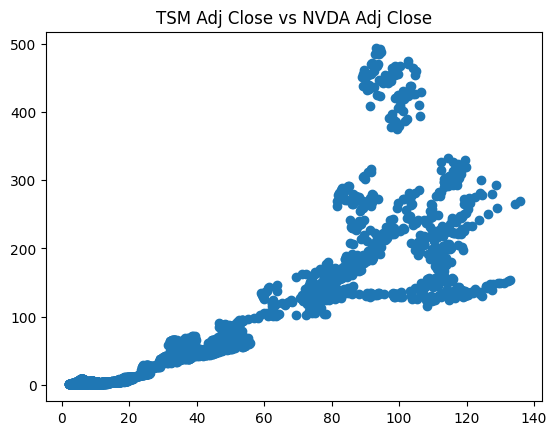

Spearman correlation: 0.868


In [ ]:
tsm_prices = yf.download('TSM', period='max')
tsm_adj = tsm_prices[['Adj Close']]
tsm_prices.head()
nvda_tsm = pd.merge(tsm_adj['Adj Close'], nvda_adj['Adj Close'], on='Date', suffixes=('_TSM', '_NVDA'))
pyplot.scatter(nvda_tsm['Adj Close_TSM'], nvda_tsm['Adj Close_NVDA'])
pyplot.title('TSM Adj Close vs NVDA Adj Close')
pyplot.show()
spearman, _ = spearmanr(nvda_tsm['Adj Close_TSM'], nvda_tsm['Adj Close_NVDA'])
print('Spearman correlation: %.3f' % spearman)

[*********************100%%**********************]  1 of 1 completed


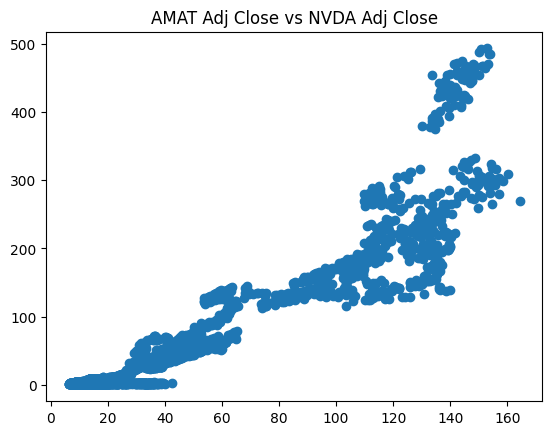

Pearson correlation: 0.938


In [ ]:
amat = yf.download('AMAT', period = 'max')
amat = amat['Adj Close']
nvda_amat = pd.merge(nvda_adj, amat, on='Date', how='inner', suffixes=('_NVDA', '_AMAT'))
pyplot.scatter(nvda_amat['Adj Close_AMAT'], nvda_amat['Adj Close_NVDA'])
pyplot.title('AMAT Adj Close vs NVDA Adj Close')
pyplot.show()
pearson, _ = pearsonr(nvda_amat['Adj Close_AMAT'], nvda_amat['Adj Close_NVDA'])
print('Pearson correlation: %.3f' % pearson)

Both TSM and AMAT have a high Pearson correlation score with NVDA adjusted close prices, indicating that they may have a casual relationship. As suppliers for essentially all of NVDA's semiconductor chips, which is a critical component for NVDA's GPU's and AI chips, it is very probable that TSM and AMAT stock prices affect NVDA's stock prices

**S&P 500 Adjusted Close Price:** As the index of the 500 largest publicly traded companies, the S&P 500 measures the state of the US equity market. Given that NVDA is the fourth largest company on the S&P 500 with a market cap of 1.1 trillion, NVDA is likely very correlated with the performance of the S&P 500.

[*********************100%%**********************]  1 of 1 completed


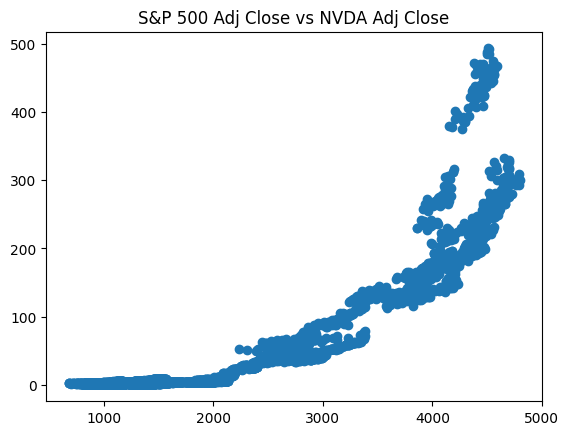

Pearson correlation: 0.862


In [ ]:
sp500 = yf.download('^GSPC', period = 'max')
sp500 = sp500['Adj Close']
nvda_sp500 = pd.merge(nvda_adj, sp500, on='Date', how='inner', suffixes=('_NVDA', '_SP'))
pyplot.scatter(nvda_sp500['Adj Close_SP'], nvda_sp500['Adj Close_NVDA'])
pyplot.title('S&P 500 Adj Close vs NVDA Adj Close')
pyplot.show()
pearson, _ = pearsonr(nvda_sp500['Adj Close_SP'], nvda_sp500['Adj Close_NVDA'])
print('Pearson correlation: %.3f' % pearson)

The S&P 500 adjusted close prices and NVDA adjusted close price seem to be very correlated with a Pearson correlation score of 0.862. This is expected as NVDA makes up a large portion of the S&P 500 and thus its stock prices will likely follow the performance of the S&P 500, which is regarded as the state of the US equity market as a whole.

**Macroeconomic Factors**: While not having as much as a direct impact as other factors, macroeconomic factors heavily influence equity markets. As a large blue chip stock in US markets, NVDA stock prices are also impacted by macroeconomic factors such as the strength of the US dollar, inflation, GDP, and interest rates.

[*********************100%%**********************]  1 of 1 completed


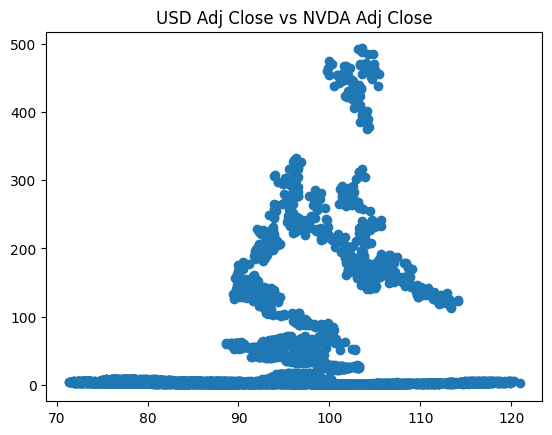

Pearson correlation: 0.242


In [ ]:
usd_index = yf.download('DX-Y.NYB', period = 'max')
usd_adj = usd_index[['Adj Close']]
usd_adj.head()
nvda_usd = pd.merge(usd_adj['Adj Close'], nvda_adj['Adj Close'], on='Date', suffixes=('_USD', '_NVDA'))
pyplot.scatter(nvda_usd['Adj Close_USD'], nvda_usd['Adj Close_NVDA'])
pyplot.title('USD Adj Close vs NVDA Adj Close')
pyplot.show()
pearson, _ = pearsonr(nvda_usd['Adj Close_USD'], nvda_usd['Adj Close_NVDA'])
print('Pearson correlation: %.3f' % pearson)

The strength of the US dollar generally affects stock indicies in that when the strength of the USD increases, stock indicies' prices tend to rise as well. However, in terms NVDA's stock prices, the strength of the USD doesn't seem to have much of an impact as indicated by the low Pearson correlation score.

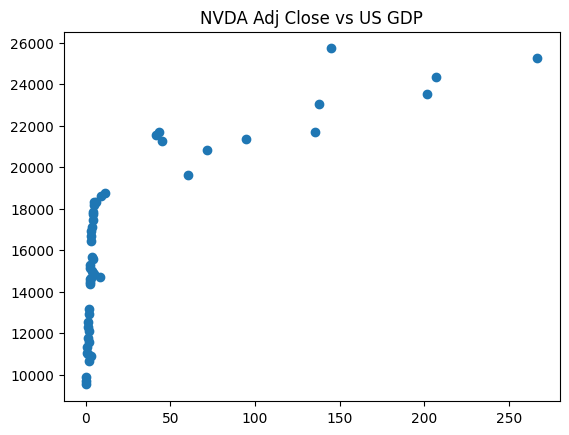

Pearson correlation: 0.764


In [ ]:
gdp = pd.read_csv('GDP.csv')
gdp['Date'] = gdp['DATE'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))
nvda_gdp = pd.merge(nvda_adj, gdp, on='Date', how='inner')
pyplot.scatter(nvda_gdp['Adj Close'], nvda_gdp['GDP'])
pyplot.title('NVDA Adj Close vs US GDP')
pyplot.show()
pearson, _ = pearsonr(nvda_gdp['Adj Close'], nvda_gdp['GDP'])
print('Pearson correlation: %.3f' % pearson)

The US GDP is a measure of overall economic productivity in the United States. Generally, stock markets tend to move in tandem with the GDP and thus increase in price as the GDP increases. Given that NVDA makes up a big chunk of the S&P 500, which measures the strength of the US equity markets, it is probable that the US GDP plays a role in influencing NVDA stock prices, as reaffirmed by the strong Pearson correlation score between US GDP and NVDA adjusted close prices.

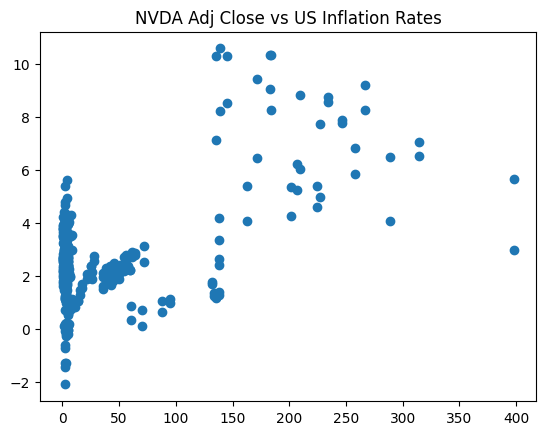

Pearson correlation: 0.591


In [ ]:
cpi = pd.read_csv('CPI.csv') #Reads dataset containing data related to the global semiconductor industry
cpi['Date'] = cpi['TIME'].apply(lambda x: datetime.strptime(str(x), "%Y-%m"))
cpi = cpi.drop( columns=[col for col in cpi.columns if col != 'Date' and col != 'Value'])
nvda_cpi = pd.merge(nvda_adj, cpi, on='Date', how='inner')
nvda_cpi.head()
pyplot.scatter(nvda_cpi['Adj Close'], nvda_cpi['Value'])
pyplot.title('NVDA Adj Close vs US Inflation Rates')
pyplot.show()
pearson, _ = pearsonr(nvda_cpi['Adj Close'], nvda_cpi['Value'])
print('Pearson correlation: %.3f' % pearson)

Inflation rates generally tend to influence stock prices positively, so stock prices generally tend to go up when inflation is rampant. This relationship is observed with NVDA stock prices given that inflation rates and NVDA adjusted close prices are somewhat correlated with a Pearson score of 0.591.

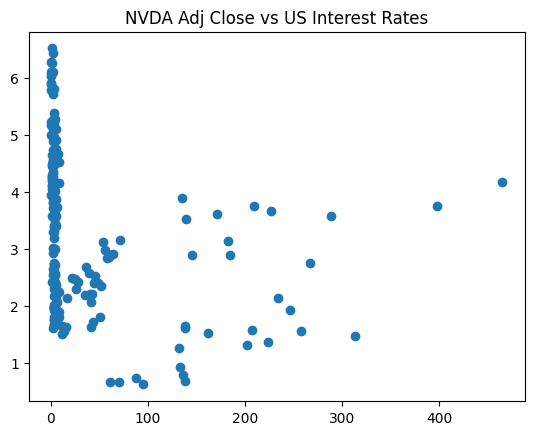

Pearson correlation: -0.297


In [ ]:
inter = pd.read_csv('int.csv')
inter['Date'] = inter['TIME'].apply(lambda x: datetime.strptime(str(x), "%Y-%m"))
inter = inter.drop( columns=[col for col in inter.columns if col != 'Date' and col != 'Value'])
nvda_inter = pd.merge(nvda_adj, inter, on='Date', how='inner')
nvda_inter.head()
pyplot.scatter(nvda_inter['Adj Close'], nvda_inter['Value'])
pyplot.title('NVDA Adj Close vs US Interest Rates')
pyplot.show()
pearson, _ = pearsonr(nvda_inter['Adj Close'], nvda_inter['Value'])
print('Pearson correlation: %.3f' % pearson)

 The most direct impact of interest rates on stock prices is through the discount rate used to value future cash flows from stocks. When interest rates rise, the discount rate also increases. This means that the present value of future earnings from stocks decreases, which can put downward pressure on stock prices. While NVDA stock prices are not too impacted by interest rates as indicated by the Pearson score of -0.297, the negative correlation between interest rates and stock prices is depicted by the the score.

## Feature Engineering

* Create relevant features for your models.
* Justify your choice of why these features are important.

In this step, I combined all the features I concluded to be relevant in determining NVDA's adjusted close price in the nvda_prices dataset. I included microeconomic and macroeconomic factors, technical indicators, and company financials in my analysis.

In [ ]:
#nvda_prices = yf.download('NVDA', period = 'max')
nvda_fin = nvda_fin.drop(columns=[col for col in nvda_fin.columns if col != 'TotalRevenue' and col != 'DilutedEPS' and
                                  col != 'Date' and col != 'PE'])
nvda_fin['Date'] = pd.to_datetime(nvda_fin['Date'], format='%Y-%m-%d')
nvda_prices = pd.merge(nvda_prices, nvda_fin, on='Date', how='left')
tsm_prices = yf.download('TSM', period='max')
tsm_adj = tsm_prices['Adj Close']
nvda_prices = pd.merge(nvda_prices, tsm_adj, on='Date', how ='left', suffixes=('', '_TSM'))
sp_prices = yf.download('^GSPC', period='max')
sp_adj = sp_prices['Adj Close']
nvda_prices = pd.merge(nvda_prices, sp_adj, on='Date', how ='left', suffixes=('', '_SP500'))
amat_prices = yf.download('AMAT', period='max')
amat_adj = amat_prices['Adj Close']
nvda_prices = pd.merge(nvda_prices, amat_adj, on='Date', how ='left', suffixes=('', '_AMAT'))
usd_index = yf.download('DX-Y.NYB', period = 'max')
usd_adj = usd_index['Adj Close']
nvda_prices = pd.merge(nvda_prices, usd_adj, on= 'Date', how = 'left', suffixes=('', '_USD'))
nvda_prices = pd.merge(nvda_prices, gdp, on='Date', how='left')
nvda_prices = pd.merge(nvda_prices, cpi, on='Date', how='left')
nvda_prices = pd.merge(nvda_prices, inter, on='Date', how='left')
nvda_prices.rename(columns={'Value_x': 'Inflation', 'Value_y': 'InterestRates'}, inplace=True)
nvda_prices = nvda_prices.drop(columns = ['DATE'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Relative Strength Indicator(RSI):** The Relative Strength Index (RSI) is a popular momentum oscillator used in technical analysis to assess the overbought or oversold conditions of a stock or other financial assets. It is a bounded oscillator, typically ranging between 0 and 100, and is calculated based on the price changes of the asset over a specified period. As such, it would be a good feature predict the trend of stock prices in the future.

In [ ]:
delta = nvda_prices['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the average gain (average of positive changes) and average loss (average of negative changes) over 28 days
avg_gain = gain.rolling(window=28, min_periods=1).mean()
avg_loss = loss.rolling(window=28, min_periods=1).mean()

# Calculate the relative strength (RS) as the ratio of average gain to average loss
rs = avg_gain / avg_loss

# Calculate the RSI using the formula
rsi = 100 - (100 / (1 + rs))

# Add the calculated RSI values as a new column to your DataFrame
nvda_prices['RSI_28'] = rsi



**Selected Features:**

Total Revenue: NVDA's total revenue per quarter is a key indicator in predicting NVDA stock prices as indicated by the extremely high correlation score between NVDA revenue and NVDA adjusted close prices. Aside from this, revenue is a key predictor of a company's financial success, which plays a huge role in influencing its stock price.

Diluted EPS: The correlation between NVDA adjusted close price and the earnings per share (EPS) is also very high with a Pearson correlation of 0.96. The EPS is important in valuing the company and thus influences stock prices as investors pay more for a company as its earnings grow. As such, it is a robust feature to include in order to predict NVDA stock prices.

PE: Although correlation between NVDA adjusted close price and the price per earnings ratio is not too high with a Spearman correlation of 0.36, the PE ratio is generally a good measure of investor sentiment of a certain stock and thus can impact stock prices due to its influence on investor decisions. As such, it is an important feature to be analyzed while making investment decisions.

50/200 Day Moving Averages: Moving averages smooth out short-term fluctuations in the data, making it easier to identify underlying trends. The 50-day moving average provides a relatively short-term view of the trend, while the 200-day moving average offers a longer-term perspective.As such, both indicators are excellent features for predicting stock price trends.

Adjusted Close S&P 500: NVDA has a 1.1 trillion dollar market cap and is the 4th largest company traded on the S&P 500. Due to NVDA's enormous size, its stock price is tied to the S&P 500, which measures the strength of US equity markets. Thus, the S&P 500 adjusted close price is definetely a factor that would influence NVDA stock prices.

Adjusted Close TSM/AMAT: As NVDA's direct suppliers for its semiconductor chips, which are used in all NVDA GPU and AI chips, TSM and AMAT's production levels have a direct impact on NVDA stock prices. As TSM and AMAT production levels directly impact their revenue and thus their stock price, it is safe to say TSM and AMAT's stock prices will influence NVDA's stock prices. This relationship is further corrobrated by the strong correlation scores between both TSM's stock prices and NVDA. AMAT and NVDA's stock prices share a strong correlation score too.

GDP: As the overall indicator of the United States' economic productivity, the GDP influences US markets as a whole. As NVDA is one of the largest comnpanies in US equity markets, the GDP has a tangible impact on NVDA's stock prices. This is further reaffirmed by the high correlation score between NVDA stock prices and the US GDP.

Inflation: Inflation is an indcator of an economy's health, where moderate inflation generally fosters economic growth, while high inflation hinders it. Thus, inflation has an indirect, but tangible impact on NVDA stock prices. This is corroborated by the fact that inflation and NVDA stock prices have moderate positive correlation.

Relative Strength Indicators (RSI): See above for reasoning

In [ ]:
selected_features = ['Adj Close', 'TotalRevenue', 'DilutedEPS', 'PE', '50-day MA', '200-day MA',
                    'Adj Close_SP500', 'Adj Close_AMAT', 'GDP', 'Inflation', 'Adj Close_TSM', 'RSI_28']
nvda_prices = nvda_prices.fillna(method='ffill')
nvda_prices = nvda_prices.dropna()
nvda_prices.set_index('Date', inplace=True)
nvda_prices = nvda_prices[selected_features]

## Predictive Modeling

* Create a model to forecast prices.
* Evaluate your model performance.
* Discuss pros/cons of the models you used.


**Long Short Term Memory Model (LSTM):** This type of deep learning model is a special type of a recurrent neural network, specially designed for dealing with time series data such as stock prices. LSTM models can capture dependencies and patterns over time, which is important for time series data. LSTM models are advantegous in that feature selection is not necessary as LSTM models can automatically extract relevant features from raw data. On the other hand, LSTM models are prone to overfitting, especially when dealing with noisy and limited data. Furthermore, LSTM models are deep learning models, so it is hard to interpret the reasons behind LSTM models' predictions. This is because since deep learning models are highly complex and consist of millions of parameters, so it is hard to intuitively grasp how the model arrives at a specific prediction.

**Model Approach:** I started by preprocessing the NVDA data for the LSTM model. Since LSTM models take in sequential data, I split the data into sequences of 40 days each and then performed a train-test split. The train data contained all data from NVDA's IPO in 1999 to early 2022 and the test data contained all data from early 2022 to present day. After preprocessing the data, I built the model architecture with 3 LSTM layers and one dense output layer with one output neuron for NVDA adjusted close price prediction. After training the model and fine tuning hyperparameters, I created a graph that plotted both the actual NVDA stock price and the model's predicted NVDA stock prices to gauge the model's performance on the test data. For further analysis, I also calculated mean square error values for both the training data and the test data.

Epoch 1/90
90/90 - 9s - loss: 0.0022 - val_loss: 0.0673 - 9s/epoch - 96ms/step
Epoch 2/90
90/90 - 1s - loss: 4.0579e-04 - val_loss: 0.0376 - 1s/epoch - 12ms/step
Epoch 3/90
90/90 - 1s - loss: 3.4711e-04 - val_loss: 0.0280 - 1s/epoch - 13ms/step
Epoch 4/90
90/90 - 1s - loss: 2.9325e-04 - val_loss: 0.0406 - 1s/epoch - 13ms/step
Epoch 5/90
90/90 - 1s - loss: 2.4922e-04 - val_loss: 0.0277 - 1s/epoch - 14ms/step
Epoch 6/90
90/90 - 1s - loss: 1.6866e-04 - val_loss: 0.0260 - 1s/epoch - 13ms/step
Epoch 7/90
90/90 - 1s - loss: 1.8603e-04 - val_loss: 0.0300 - 1s/epoch - 16ms/step
Epoch 8/90
90/90 - 1s - loss: 1.4832e-04 - val_loss: 0.0144 - 1s/epoch - 15ms/step
Epoch 9/90
90/90 - 1s - loss: 1.4135e-04 - val_loss: 0.0241 - 1s/epoch - 15ms/step
Epoch 10/90
90/90 - 1s - loss: 1.7032e-04 - val_loss: 0.0205 - 1s/epoch - 13ms/step
Epoch 11/90
90/90 - 1s - loss: 1.7884e-04 - val_loss: 0.0128 - 1s/epoch - 12ms/step
Epoch 12/90
90/90 - 1s - loss: 1.3237e-04 - val_loss: 0.0211 - 1s/epoch - 13ms/step
Epoch

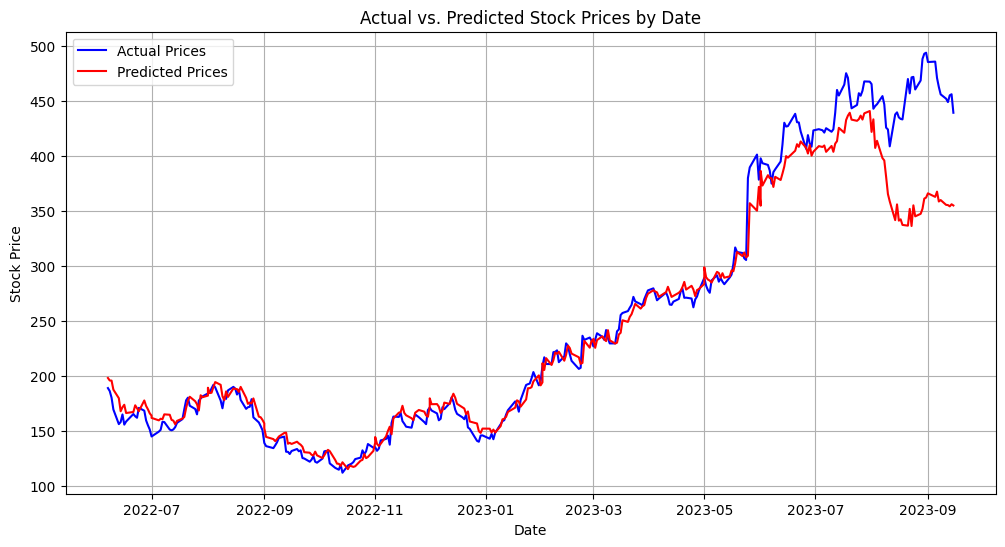

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the number of time steps for the LSTM
n_steps = 60

# Define the number of features in the dataset
n_features = len(selected_features)

# Split the data into training and testing sets
test_start_date = nvda_prices.index[-1] - pd.DateOffset(months=18)
train_data = nvda_prices.loc[nvda_prices.index < test_start_date]
test_data = nvda_prices.loc[nvda_prices.index >= test_start_date]
# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create sequences for training and testing data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps, 0])  # Assuming the target is in the first column
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled, n_steps)
X_test, y_test = create_sequences(test_data_scaled, n_steps)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
model.fit(X_train, y_train, epochs=90, batch_size=64, verbose=2, validation_data=(X_test[7:], y_test[7:]))

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#Convert scaled data back to actual stock values for analysis
zeros_array = np.zeros((train_predict.shape[0], n_features-1))
train_predict_combined = np.hstack((train_predict, zeros_array))
train_predict = scaler.inverse_transform(train_predict_combined)
train_predict = train_predict[:, 0]
zeros_array = np.zeros((test_predict.shape[0], n_features-1))
test_predict_combined = np.hstack((test_predict, zeros_array))
test_predict = scaler.inverse_transform(test_predict_combined)
test_predict = test_predict[:, 0]
zeros_array_train = np.zeros((y_train.shape[0], n_features-1))
zeros_array_test = np.zeros((y_test.shape[0], n_features-1))
y_train_combined = np.hstack((y_train.reshape(-1, 1), zeros_array_train))
y_test_combined = np.hstack((y_test.reshape(-1, 1), zeros_array_test))
y_train_combined = scaler.inverse_transform(y_train_combined)
y_test_combined = scaler.inverse_transform(y_test_combined)
y_train = y_train_combined[:, 0]
y_test = y_test_combined[:, 0]

# Calculate MSE for evaluation
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')


date_index = test_data.index[n_steps:]  # Shift to align with predictions

# Create a DataFrame to store actual and predicted prices
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predict.flatten()}, index=date_index)

plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual Prices', color='b')
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Prices', color='r')
plt.title('Actual vs. Predicted Stock Prices by Date')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


The graph above compares actual NVDA stock prices and mode project NVDA prices in the last 18 months. Based off this graph, it can be observed that the model did indeed accurately predict NVDA stock price trends over the course 18 months. However, the model seems to be overfitting to some extent, given that the testing data mean squared error is much greater than the training data mean squared error. This model can be improved with additional feature engineering and further hyperparamter fine tuning. But overall the model captures the general trajectory of NVDA's stock prices in the last 18 months with a great deal of precision.

**Forecasting Stock Prices 100 Days Ahead:**

1/1 [==============================] - 0s 20ms/step


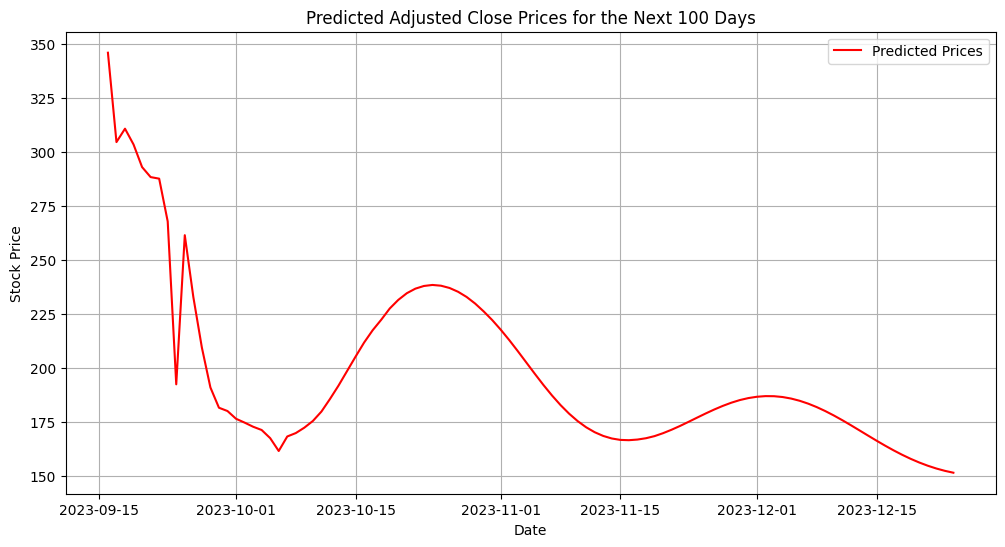

In [ ]:
input_seq = test_data_scaled[-n_steps:]

predictions = []

for _ in range(100):
    input_seq_reshaped = input_seq.reshape((1, n_steps, n_features))
    prediction = model.predict(input_seq_reshaped)
    predictions.append(prediction[0, 0])
    new_step = np.zeros((1, n_features))
    new_step[0, 0] = prediction
    new_step[0, 1:] = input_seq[-1, :-1]
    input_seq = np.concatenate((input_seq[1:], new_step), axis=0)

zeros_array = np.zeros((len(predictions), n_features-1))
predictions_combined = np.hstack((np.array(predictions).reshape(-1, 1), zeros_array))
predictions = scaler.inverse_transform(predictions_combined)
predictions = predictions[:, 0]

next_100 = pd.date_range(start=nvda_prices.index[-1] + pd.DateOffset(days=1), periods=100)
predictions_df = pd.DataFrame(predictions, index=next_100, columns=['Predicted'])

plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted Prices', color='r')
plt.title('Predicted Adjusted Close Prices for the Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
current_month = predictions_df.index[0].month
last_seen_month = current_month
for date, row in predictions_df.iterrows():
    current_month = date.month
    if current_month != last_seen_month:
        print(f"Date: {date.strftime('%Y-%m-%d')}, Stock Price: {row['Predicted']}")
        last_seen_month = current_month

Date: 2023-10-01, Stock Price: 176.42519986652945
Date: 2023-11-01, Stock Price: 217.70099917987224
Date: 2023-12-01, Stock Price: 186.62975076772594


Based off the model's forecast, NVDA prices are expected to drop in the next three months. The model predicted NVDA stock prices to be 176.43 dollars on October 1st, 195.89 dollars on November 1st, and 217.70 dollars on December 1st. These forecasted prices are based on rolling windows from historical NVDA data, so while the actual price predictions may be inaccurate, the downward trend in stock prices is accurate. Projected data is only available for the next 100 days because the trends depicted at the end of the LSTM test data are irrelevant for stock price prediction several months in the future.

## Recommendation

* Justify your research.
* Insights on potential risks/uncertainties. Do you foresee any macroeconomic risks (economic turbulence, politics, etc.), or microeconomic risks (competition, bubbles, product demand, etc.)?

Overall, I recommend not to buy Nvidia stock at its current price. Based on the LSTM model's predictions, a downward trend in Nvidia's price is looming, given its exorbiant stock prices. Nvidia stock prices in the last year alone have increased by almost 300% and Nvidia's stock price currently sits in the mid-400 range. While, Nvidia in the past year has grown its revenue and earnings per share significantly with its investment in AI chips that power large learning models such as ChatGPT, the rate at which investors are pouring money into Nvidia outpaces the company's growing value. The reason the stock price of Nvidia has grown so much over the past year can largely be attributed to the AI hype following the release of Open AI's ChatGPT, last year. Even with AI tailwinds going into early 2024, the company's true valuation likely lies near $150-200 a share, as evident by a simple DCF valuation and my LSTM model. Once the AI bubble pops, investors could see massive losses, similar to that of the cryptocurrency currency crash in 2022. Another concern is the GPU bubble that has been forming over the past couple of years. Initally, demand for GPUs surged during the era of cryptocurrency mining. However, in recent years GPUs have quickly been rendered obsolete by application specific integrated circuits (ASICs) which largely outperform GPUs in crypto mining. GPU demand increased again in the past year with the advent of large language models, which require high amounts of computing power to train. However, just as crypto miners migrated to more specialized technology, AI companies will recognize the need for more energy efficient and specialized hardware to tackle AI specific tasks. While GPUs have many vital applications, given the oversaturation of the market and companies' redirection to more innovative solutions, significant shifts in the GPU market are looming. Given that GPUs are one of Nvidia's flagship products, it would be prudent to account for the looming GPU bubble that is now showing signs of vulnerability. Now, even if the AI market and GPU market continues to grow at explosive rates, Nvidia will not be the only company in the AI chip market. While Nvidia has a clear lead in the AI chip market, which attributed to its rising stock prices this year, competition from AMD, Intel, and Qualcomm is not far behind. Once comparable chips become available on the market, Nvidia's inflated pricing and profits will no longer be sustained, similar to what happened with the fervor for high-end crypto mining chips. In 2021, these chips were in high demand, fueling the company's success, but the bubble burst in 2022, leading to a complete halt in sales and income growth for Nvidia last year. Other than just microeconomic risks, Nvidia's growth may be affected by export restrictions placed by the Biden administration on China. The Biden administration is attempting to restrict China's access to critical technology, which will likely mean restricting the sale of the high-end chips Nvidia is selling to power new AI platforms. China represents between 20-25% of Nvidia's data center business and Nvidia's CFO, Colette Kress, himself stated, "restrictions prohibiting the sale of our Data Center GPUs to China, if implemented, will result in a permanent loss and opportunity for the US industry to compete and lead in one of the world's largest markets". The risk of a huge portion of Nvidia's profits drying up is not accounted for in its stock price, given that Nvidia stock is trading on a price to earnings ratio of 61. In essence, given the exorbiant stock prices relative to earnings, the looming AI and GPU bubbles, AI-specialized chip competition from major competitors, the trade war between the United States and China, and the LSTM model's predictions, I am confident that Nvidia's stock is overvalued and that it is not a buy at this point in time.